In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


%matplotlib inline

In [2]:
train_df = pd.read_csv('data/train.csv', index_col='Id')
train_df.columns

Index([u'Elevation', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points', u'Wilderness_Area1',
       u'Wilderness_Area2', u'Wilderness_Area3', u'Wilderness_Area4',
       u'Soil_Type1', u'Soil_Type2', u'Soil_Type3', u'Soil_Type4',
       u'Soil_Type5', u'Soil_Type6', u'Soil_Type7', u'Soil_Type8',
       u'Soil_Type9', u'Soil_Type10', u'Soil_Type11', u'Soil_Type12',
       u'Soil_Type13', u'Soil_Type14', u'Soil_Type15', u'Soil_Type16',
       u'Soil_Type17', u'Soil_Type18', u'Soil_Type19', u'Soil_Type20',
       u'Soil_Type21', u'Soil_Type22', u'Soil_Type23', u'Soil_Type24',
       u'Soil_Type25', u'Soil_Type26', u'Soil_Type27', u'Soil_Type28',
       u'Soil_Type29', u'Soil_Type30', u'Soil_Type31', u'Soil_Type32',
       u'Soil_Type33', u'Soil_Type34', u'Soil_Type35', u'Soil_Type36',
       u'Soil_

In [3]:
train_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
# No missing values
train_df.isnull().any().any()

False

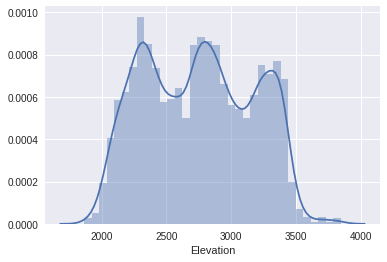

In [44]:
sns.distplot(train_df.Elevation)

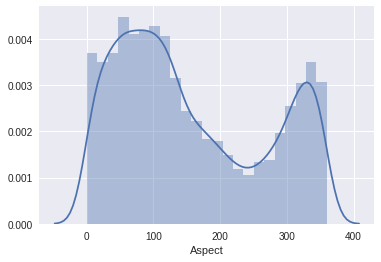

In [43]:
sns.distplot(train_df.Aspect)

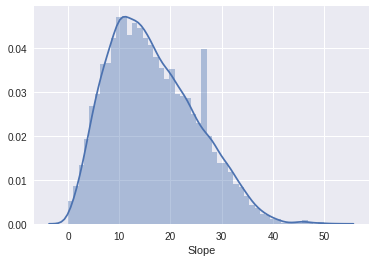

In [45]:
sns.distplot(train_df.Slope)

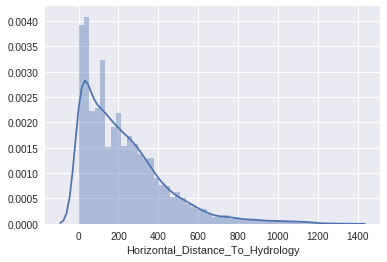

In [47]:
sns.distplot(train_df.Horizontal_Distance_To_Hydrology)

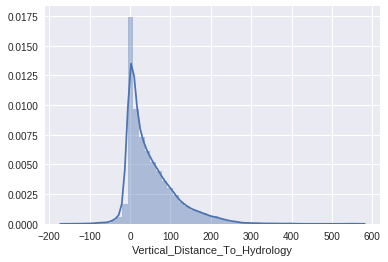

In [48]:
sns.distplot(train_df.Vertical_Distance_To_Hydrology)

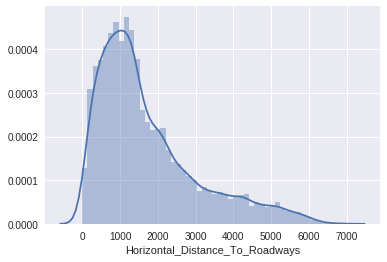

In [49]:
sns.distplot(train_df.Horizontal_Distance_To_Roadways)

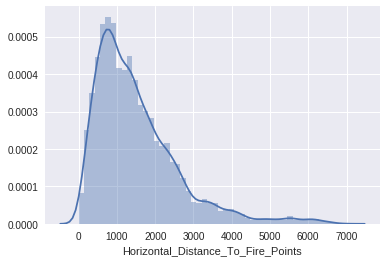

In [55]:
sns.distplot(train_df.Horizontal_Distance_To_Fire_Points)

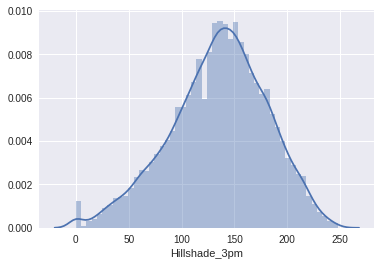

In [54]:
sns.distplot(train_df.Hillshade_3pm)

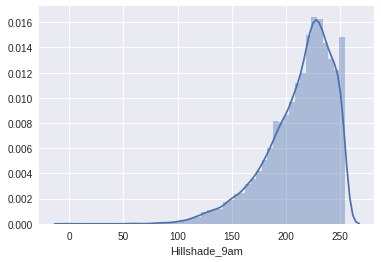

In [52]:
sns.distplot(train_df.Hillshade_9am)

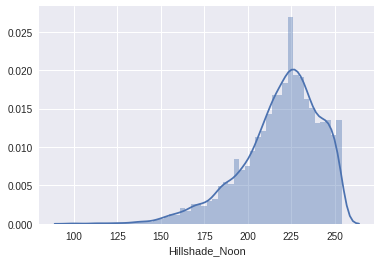

In [53]:
sns.distplot(train_df.Hillshade_Noon)

In [99]:
y = train_df.Cover_Type
X = train_df.drop("Cover_Type", 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Using simple Logistic Regresssion
lr = LogisticRegression(multi_class='multinomial', solver="newton-cg", n_jobs=2)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print sklearn.metrics.accuracy_score(y_test, preds)

0.708774250441


In [142]:
for target_class in sorted(y.unique()):
    indexes_best_features = np.array(map(abs, lr.coef_[target_class - 1])).argsort()[::-1][0:3]
    output = "Most important features for class {}:\n".format(target_class)
    
    for index in indexes_best_features:
        output += '{}, {}\n'.format(X.columns[index], lr.coef_[target_class - 1][index])
    
    print output
    
# So, the categorical variables are what matters most. Probably that's why using PCA didn't workout.     
    

Most important features for class 1:
Soil_Type22, 1.02275098049
Wilderness_Area1, 0.717325923338
Soil_Type38, -0.711507984658

Most important features for class 2:
Wilderness_Area3, -1.22339042082
Soil_Type12, 0.969962500024
Soil_Type17, -0.733735573109

Most important features for class 3:
Wilderness_Area3, 1.17013417008
Soil_Type4, 0.923523758976
Soil_Type2, 0.699331284258

Most important features for class 4:
Wilderness_Area4, 1.70912341198
Wilderness_Area3, -1.28035851271
Soil_Type3, 0.993650786234

Most important features for class 5:
Soil_Type30, 1.12299454259
Wilderness_Area4, -0.961038978495
Soil_Type12, -0.889099625028

Most important features for class 6:
Wilderness_Area3, 1.38305298418
Wilderness_Area1, -1.05610936879
Soil_Type1, 0.659384568656

Most important features for class 7:
Soil_Type32, -1.27096085091
Soil_Type38, 1.13594078889
Soil_Type39, 0.992707625046



In [145]:
# What if I just use the categorical variables?
y = train_df.Cover_Type
X_categorical = train_df[[u'Wilderness_Area1',
       u'Wilderness_Area2', u'Wilderness_Area3', u'Wilderness_Area4',
       u'Soil_Type1', u'Soil_Type2', u'Soil_Type3', u'Soil_Type4',
       u'Soil_Type5', u'Soil_Type6', u'Soil_Type7', u'Soil_Type8',
       u'Soil_Type9', u'Soil_Type10', u'Soil_Type11', u'Soil_Type12',
       u'Soil_Type13', u'Soil_Type14', u'Soil_Type15', u'Soil_Type16',
       u'Soil_Type17', u'Soil_Type18', u'Soil_Type19', u'Soil_Type20',
       u'Soil_Type21', u'Soil_Type22', u'Soil_Type23', u'Soil_Type24',
       u'Soil_Type25', u'Soil_Type26', u'Soil_Type27', u'Soil_Type28',
       u'Soil_Type29', u'Soil_Type30', u'Soil_Type31', u'Soil_Type32',
       u'Soil_Type33', u'Soil_Type34', u'Soil_Type35', u'Soil_Type36',
       u'Soil_Type37', u'Soil_Type38', u'Soil_Type39', u'Soil_Type40',]]

X_train, X_test, y_train, y_test = train_test_split(X_categorical, y, test_size=0.3)

# Using simple Logistic Regresssion
lr = LogisticRegression(multi_class='multinomial', solver="newton-cg", n_jobs=2)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print sklearn.metrics.accuracy_score(y_test, preds)

# Ok, it's best the use the continous variables.


0.606040564374


In [89]:
# Cross Validation
y = train_df.Cover_Type
X = train_df.drop("Cover_Type", 1)

# Using simple Logistic Regresssion
lr = LogisticRegression(multi_class='multinomial', solver="newton-cg", n_jobs=2)
scores = cross_val_score(lr, X, y, cv=5)

In [91]:
print sum(scores) / 5

0.643055555556


# Check Multicollinearity

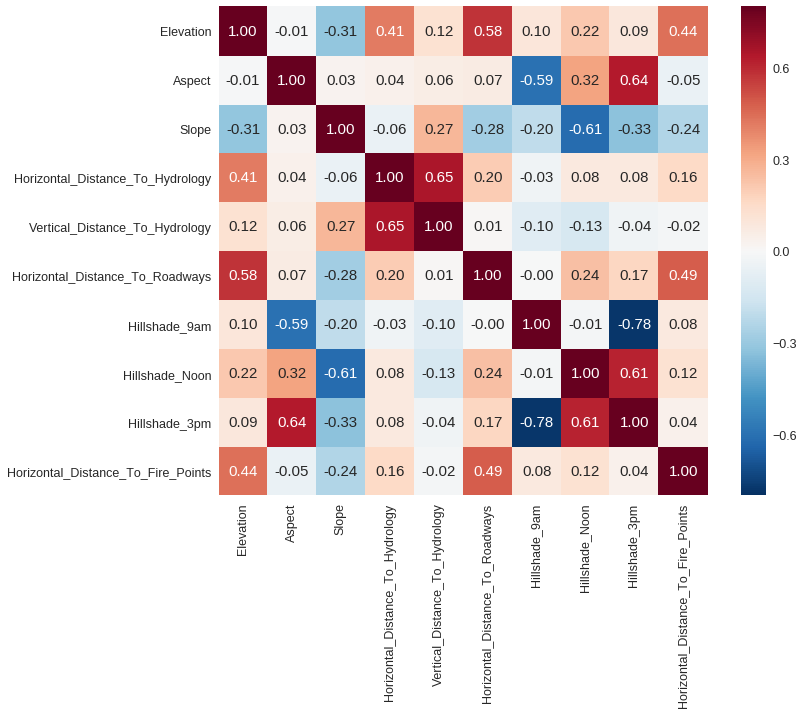

In [34]:
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
sns.heatmap(train_df[[u'Elevation', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points']].corr(), vmax=.8, square=True, annot=True, fmt='.2f');

In [92]:
# There are some slightly correlated variables. This could affect the model. Maybe using PCA solves this?
# When I do PCA, getting only 4 components for the numerical continuos independent variables, 
# I don't improve the results


y = train_df.Cover_Type
X = train_df.drop("Cover_Type", 1)

X_continuous = X[[u'Elevation', u'Aspect', u'Slope', u'Horizontal_Distance_To_Hydrology',
       u'Vertical_Distance_To_Hydrology', u'Horizontal_Distance_To_Roadways',
       u'Hillshade_9am', u'Hillshade_Noon', u'Hillshade_3pm',
       u'Horizontal_Distance_To_Fire_Points']]

X_categorical = X[[u'Wilderness_Area1',
       u'Wilderness_Area2', u'Wilderness_Area3', u'Wilderness_Area4',
       u'Soil_Type1', u'Soil_Type2', u'Soil_Type3', u'Soil_Type4',
       u'Soil_Type5', u'Soil_Type6', u'Soil_Type7', u'Soil_Type8',
       u'Soil_Type9', u'Soil_Type10', u'Soil_Type11', u'Soil_Type12',
       u'Soil_Type13', u'Soil_Type14', u'Soil_Type15', u'Soil_Type16',
       u'Soil_Type17', u'Soil_Type18', u'Soil_Type19', u'Soil_Type20',
       u'Soil_Type21', u'Soil_Type22', u'Soil_Type23', u'Soil_Type24',
       u'Soil_Type25', u'Soil_Type26', u'Soil_Type27', u'Soil_Type28',
       u'Soil_Type29', u'Soil_Type30', u'Soil_Type31', u'Soil_Type32',
       u'Soil_Type33', u'Soil_Type34', u'Soil_Type35', u'Soil_Type36',
       u'Soil_Type37', u'Soil_Type38', u'Soil_Type39', u'Soil_Type40',]]


pca = PCA(n_components=4)
pca.fit(X_continuous)
X_pca = pca.transform(X_continuous)

X_new = X_categorical
X_new["pca_1st_component"] = X_pca[:,0]
X_new["pca_2nd_component"] = X_pca[:,1]
X_new["pca_3rd_component"] = X_pca[:,2]
X_new["pca_4th_component"] = X_pca[:,3]


lr = LogisticRegression(multi_class='multinomial', solver="newton-cg", max_iter=200, n_jobs=2)
scores = cross_val_score(lr, X_new, y, cv=5)
print sum(scores) / 5

/home/lcampos/Envs/kaggle/lib/python2.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/lcampos/Envs/kaggle/lib/python2.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/lcampos/Envs/kaggle/lib/python2.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

# Try SVM

In [42]:
svm = SVC()
svm.fit(X_train, y_train)
preds = svm.predict(X_test)

print sklearn.metrics.accuracy_score(y_test, preds)

0.143298059965


In [44]:
svm = LinearSVC()
svm.fit(X_train, y_train)
preds = svm.predict(X_test)

print sklearn.metrics.accuracy_score(y_test, preds)

0.272486772487


In [ ]:
std_scaler = StandardScaler()

In [ ]:
# Scale numerical variables
# What to do about the categorical variables?
# Cross validation